# Regression

In [1]:
%matplotlib inline
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model

C:\Users\srotc_000\Anaconda3\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
def normale(z, m, sigma):
    """ Loi normale, z sachant m et sigma"""
    return np.exp(-(z-m)**2/(2*sigma))/np.sqrt(2*np.pi*sigma)

In [140]:
class Regression:
    """Classe qui encapsule l'apprentissage"""
    
    def __init__(self, D, R):
        """Constructeur"""
        
        self.D = D #Nombre de variables explicatives
        self.R = R #Nombre d'annotateurs
     
    
    def chargeData(self, path, recentrage = True):
        """Fonction qui charge les données avec path le chemin du fichier CSV. 
        Par défault, on impose un recentrage des donnée"""
        
        data = pd.read_csv(path, delimiter = ";")
        self.trueLabel = np.array(data.ix[:,self.D])
        self.y = np.array(data.ix[:,self.D+1:]) #labels des annotateurs
        x = np.array(data.ix[:,0:self.D]) #variables explicatives
        x = np.insert(x,0,1,axis=1)
        self.trueX = x
        if (recentrage):
            self.x = (x - np.mean(x,axis=0))/(np.std(x, axis=0))
        else:
            self.x = x
        self.N = self.y.shape[0] #Nombre de lignes
     
    
    def initw(self):
        """Initialisation de w"""

        self.w = np.random.random_sample((self.D+1,))
    
    
    def update_lambda(self):
        """Update du vecteur lambda (Rx1)"""
        
        lambd = []
        for j in range(0,self.R):
            tmp = 0
            for i in range(0,self.N):
                tmp += (self.y[i][j] - self.w.T.dot(self.x[i]))**2
            lambd.append(self.N/tmp)
        self.lambd = np.array(lambd)
    
    
    def update_w(self):
        """Update du vecteur w (Nx1)"""
        
        w = 0
        tmp = 0
        for i in range(0,self.N):
            tmp += self.x[i].dot(self.x[i].T)
            tmp2 = 0
            for j in range(0,self.R):
                tmp2 += self.lambd[j]*self.y[i][j]
            w += self.x[i]*tmp2/(np.sum(self.lambd))
        self.w = w/tmp
       
    
   
    def logLikelihood(self):
        """Calcul de la log-vraissemblance."""
    
        #On calcule directement la log-vraissemblance.
        vraissemblance = 0
        for i in range(0,self.N):
            for j in range(0,self.R):
                vraissemblance += np.log(normale(self.y[i][j],self.w.T.dot(self.x[i]),1/self.lambd[j]))
        return vraissemblance
    

   
    def erreur(self):
        """Quelle est l'erreur quadratique de notre modèle ?"""
        return np.mean((self.labels_predits - self.trueLabel)**2)
        
        
    def pred_labels(self):
        #Label prédit par le modèle
        #self.labels_predits = np.random.normal(self.w.T.dot(self.x),1/self.lambd[j])
        self.labels_predits = self.x.dot(self.w)
        
    
    def train(self, maxIter = 1000, minIter = 20, epsilon = 0.01, graphe=True):
        """Fonction qui lance l'entrainement du modèle.
        La variable graphe sert à plotter la log-likelihood au fil des itérations.
        La log-likelihood devrait être croissante."""
        
        self.maxIter = maxIter
        
        self.initw()

        compteur = 0
        self.histLogLikelihood = []

        while (compteur < maxIter):
            self.update_lambda()
            wOld = self.w
            self.update_w()
            wNew = self.w
            self.histLogLikelihood.append(self.logLikelihood())
            diffW = wOld - wNew
            if (np.linalg.norm(diffW) < epsilon):
                print("SEUIL DE CONVERGENCE SUR W ATTEINT")
                print ("ITERATION : ", compteur)
                print("Vraissemblance : ", self.logLikelihood())
                print("Norme de diff_w : ", np.linalg.norm(diffW))
                print("Lambda : ", self.lambd)
                break
            
            if (compteur % 1 == 0):
                print ("ITERATION : ", compteur)
                print("Vraissemblance : ", self.logLikelihood())
                print("Norme de diff_w : ", np.linalg.norm(diffW))
                print("Lambda : ", self.lambd)
                print("W : ", self.w)
            compteur = compteur + 1
        
        if graphe:
            plt.plot(self.histLogLikelihood)
            plt.title('Log-vraissemblance au fil des itérations')
       
    
    def linearRegression(self):
        """On entraine avec sklearn un modèle de régression linéaire sur les données."""
        
        self.regr = linear_model.LinearRegression()
        self.regr.fit(self.x, self.trueLabel)
        print('Coefficients: \n', self.regr.coef_)
        print('Constante: \n', self.regr.intercept_)
        print('Erreur quadratique: \n', np.mean((self.regr.predict(self.x))-self.trueLabel)**2)


ITERATION :  0
Vraissemblance :  -40180.0467741
Norme de diff_w :  3.19026768553
Lambda :  [ 0.01144621  0.01513309  0.01571957]
W :  [ 2.21818593  2.52763791  1.21027781  0.94567988  0.3262584   2.02947058
  0.86450216  0.44051978  0.5927009 ]
ITERATION :  1
Vraissemblance :  -36808.4442088
Norme de diff_w :  0.00136490215318
Lambda :  [ 0.02640778  0.05937081  0.07051341]
W :  [ 2.2174441   2.52843186  1.21004625  0.94545602  0.3261995   2.02878153
  0.8643063   0.44035916  0.59251079]
ITERATION :  2
Vraissemblance :  -36808.4437327
Norme de diff_w :  2.94983287382e-07
Lambda :  [ 0.02640449  0.059355    0.07049077]
W :  [ 2.21744424  2.52843166  1.21004629  0.94545606  0.32619951  2.02878166
  0.86430634  0.44035919  0.59251082]
ITERATION :  3
Vraissemblance :  -36808.4437327
Norme de diff_w :  5.48767325564e-11
Lambda :  [ 0.0264045   0.059355    0.07049077]
W :  [ 2.21744424  2.52843166  1.21004629  0.94545606  0.32619951  2.02878166
  0.86430634  0.44035919  0.59251082]
SEUIL DE 

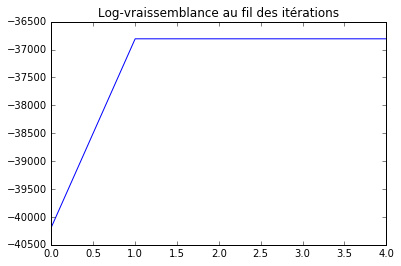

In [141]:
abalone = Regression(8, 3)
abalone.chargeData('Datasets/Abalone/Abalone_Reg.csv', recentrage = False)
abalone.train(maxIter = 500, epsilon = 1e-12, graphe = True)

In [148]:
abalone.pred_labels()
abalone.labels_predits, abalone.w, abalone.erreur()

(array([  9.5711425 ,   8.58404951,   7.61024678, ...,  11.66543469,
          8.9793961 ,  13.95114826]),
 array([ 2.21744424,  2.52843166,  1.21004629,  0.94545606,  0.32619951,
         2.02878166,  0.86430634,  0.44035919,  0.59251082]),
 13.234157714096954)

In [143]:
abalone.linearRegression()

Coefficients: 
 [  0.           0.3884832   -0.82639908  11.96403178  11.20449196
   9.07020864 -20.10614364 -10.15510106   8.70110596]
Constante: 
 2.98229797319
Erreur quadratique: 
 3.37519576953e-32


In [131]:
abalone.regr.score(abalone.x, abalone.trueLabel)

0.53534457649388245

In [144]:
abalone.regr.predict(abalone.x)

array([  9.2423098 ,   7.81022316,  10.84388028, ...,  11.10439683,
         9.51353803,  11.14402922])

In [126]:
m = np.mean(abalone.trueX, axis=0)
mu = np.std(abalone.trueX, axis=0)
m,mu

(array([ 14.]), array([ 14.14213562]))

In [118]:
42/14

3.0

In [119]:
m/mu*42

array([ 41.57787873])

In [120]:
42/mu*10-m/mu*42

array([-11.87939392])

In [127]:
42*(-10*mu+m)

array([-5351.69696197])